In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dir = 'C:/Users/Manav/PycharmProjects/Deep Learning/Neural Networks/CNN/train'
test_dir = 'C:/Users/Manav/PycharmProjects/Deep Learning/Neural Networks/CNN/test'
validation_dir = 'C:/Users/Manav/PycharmProjects/Deep Learning/Neural Networks/CNN/validation'

# Data Preprocessing
 
 1)Read the picture files.
 
 2)Decode the JPEG content to RBG grids of pixels.
 
 3)Convert these into floating point tensors.
 
 4)Rescale the pixel values (between 0 and 255) to [0,1] interval.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Generating badges of tensor image data

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary'
)

validation_generator =test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary'
)
print(train_generator)
print(validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training Model

In [7]:
model = keras.models.Sequential()

In [8]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
model.compile(loss = 'binary_crossentropy',optimizer = keras.optimizers.RMSprop(learning_rate=1e-4),metrics = ['acc'])

In [11]:
history = model.fit(
            train_generator,
            steps_per_epoch=20,
            epochs=20,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/20
20/20 [==============================] - 12s 560ms/step - loss: 0.7037 - acc: 0.5025 - val_loss: 0.7059 - val_acc: 0.5000
Epoch 2/20
20/20 [==============================] - 11s 579ms/step - loss: 0.6903 - acc: 0.5350 - val_loss: 0.6946 - val_acc: 0.5020
Epoch 3/20
20/20 [==============================] - 12s 584ms/step - loss: 0.6841 - acc: 0.5725 - val_loss: 0.6956 - val_acc: 0.5000
Epoch 4/20
20/20 [==============================] - 11s 574ms/step - loss: 0.6752 - acc: 0.6200 - val_loss: 0.7126 - val_acc: 0.5000
Epoch 5/20
20/20 [==============================] - 11s 557ms/step - loss: 0.6711 - acc: 0.5825 - val_loss: 0.6835 - val_acc: 0.5020
Epoch 6/20
20/20 [==============================] - 11s 541ms/step - loss: 0.6676 - acc: 0.5725 - val_loss: 0.6587 - val_acc: 0.6260
Epoch 7/20
20/20 [==============================] - 11s 577ms/step - loss: 0.6416 - acc: 0.6275 - val_loss: 0.6566 - val_acc: 0.5870
Epoch 8/20
20/20 [==============================] - 11s 559ms/step - 

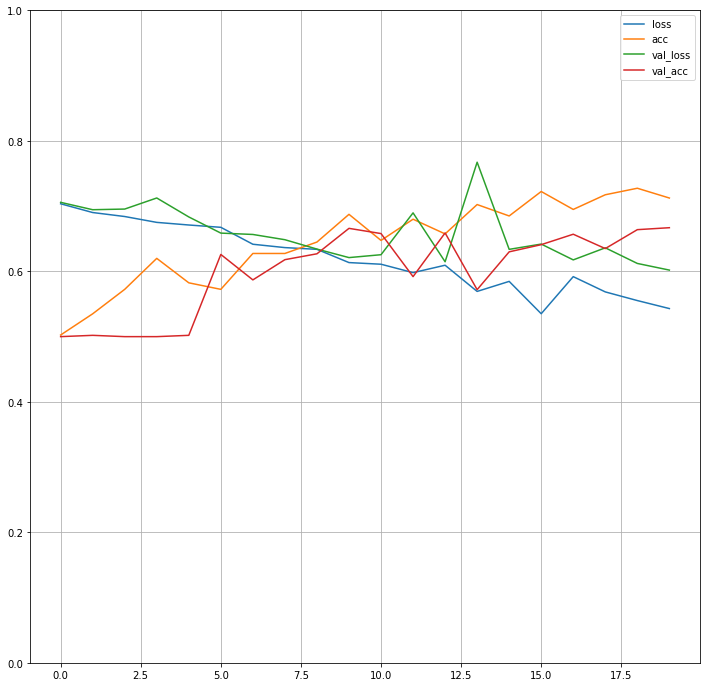

In [12]:
pd.DataFrame(history.history).plot(figsize=(12,12))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
model.save('DogCatModel.h5')

In [14]:
del model
keras.backend.clear_session()

# Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range=-40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range = 0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=32,
                    class_mode='binary'
)

validation_generator =test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=32,
                    class_mode='binary'
)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = keras.optimizers.RMSprop(learning_rate=1e-4),metrics = ['acc'])

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=10,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=50)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,12))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save('DogCatModelDataAug.h5')

# Transfer Learning

In [ ]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range=-40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range = 0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=32,
                    class_mode='binary'
)

validation_generator =test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=32,
                    class_mode='binary'
)

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base.trainable = False

In [ ]:
conv_base.summary()

In [ ]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = keras.optimizers.RMSprop(learning_rate=1e-4),metrics = ['acc'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN Project Model - {epoch:02d}.h5 ",save_best_only=True)

In [ ]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=50,
class_mode='binary')

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch=10,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=100,
            callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,12))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save('DogCatModelTransferLearn.h5')

In [ ]:
model.evaluate_generator(test_generator,steps=50)